In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [41]:
path = Path('bad_good_guiness')
fns = get_image_files(path)
fns

(#232) [Path('bad_good_guiness/bad/070d5bb8-b6d1-4ab1-aadd-9e83e3aa6219.jpg'),Path('bad_good_guiness/bad/07e1e0c2-bc1b-48bb-ba48-beb7560a71cf.jpg'),Path('bad_good_guiness/bad/0912b000-cd2b-4825-affe-c4cafd8a2a28.jpg'),Path('bad_good_guiness/bad/0a94efd6-dab1-4fb8-b5f8-a942b3c5a8d5.jpg'),Path('bad_good_guiness/bad/0c6e1a38-93ef-4485-901c-54b514bcc751.jpg'),Path('bad_good_guiness/bad/11680531-3616-4363-a45c-1812b9cb08bb.jpg'),Path('bad_good_guiness/bad/14232171-4bbb-4d4e-9d06-d2c37b904735.jpg'),Path('bad_good_guiness/bad/15f34151-e8f8-44c2-bed1-fd1c3d85986b.jpg'),Path('bad_good_guiness/bad/18236218-2250-40bc-a70a-3046699bb687.jpg'),Path('bad_good_guiness/bad/1cdebe5e-0f84-4a57-ae6b-ab6c81577aa7.jpg')...]

In [42]:
failed = verify_images(fns)
failed

(#0) []

In [43]:
failed.map(Path.unlink);

In [64]:
beers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [65]:
dls = beers.dataloaders(path)

In [73]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.699649,2.992114,0.568182,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.018645,1.686604,0.568182,00:13
1,0.936121,0.654298,0.272727,00:10
2,0.747162,0.486221,0.159091,00:10
3,0.640650,0.445739,0.113636,00:10
4,0.557773,0.426145,0.113636,00:10
5,0.502906,0.418396,0.113636,00:10


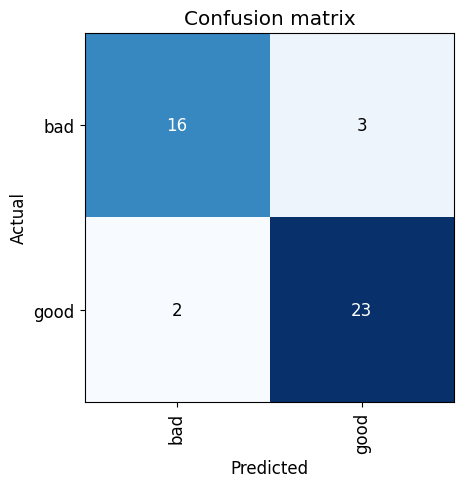

In [74]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

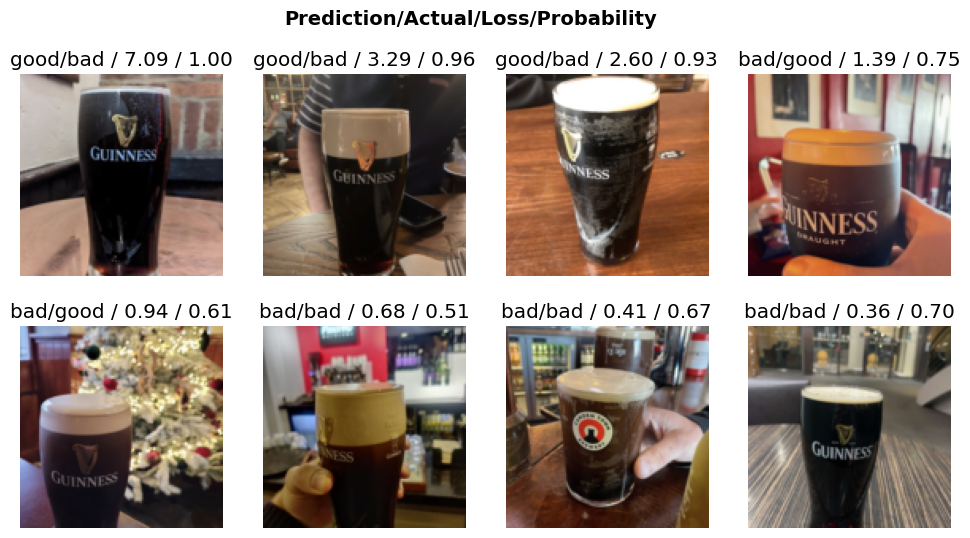

In [75]:
interp.plot_top_losses(8, nrows=2)

In [56]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [62]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [76]:
interp.print_classification_report()

              precision    recall  f1-score   support

         bad       0.89      0.84      0.86        19
        good       0.88      0.92      0.90        25

    accuracy                           0.89        44
   macro avg       0.89      0.88      0.88        44
weighted avg       0.89      0.89      0.89        44



In [77]:
learn.export(fname='is_shit.pkl')

In [78]:
learn.dls.vocab

['bad', 'good']